Función de Decisión:	[-3.88486893  7.15100813 -0.99967025 -3.79899943  0.99983512  3.79916431
 -1.00016488]
Predicción:		[1 2 1 1 2 2 1]
Vectores Soporte:	3
Multiplicadores:	[[ 0.32035055  0.34106569  0.66141624]]


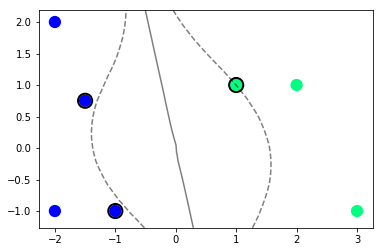

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from ipywidgets import interact

def mySVC(myKernel='linear', myC=.01):       
    #X = np.array([[0, 0], [1, 1], [0, 1], [1, 0]])
    #y = np.array([1,1,-1,-1])
    #y = np.array([1, 2])
    X = np.array([[-2, 2], [3, -1], [-1, -1], [-2, -1]
                  , [1, 1], [2, 1], [-1.5,.75]])
    y = np.array([1,2,1, 1, 2, 2, 1])
    
    clf = SVC(kernel=myKernel,C=myC)    
    clf.fit(X, y) 
    
    print("Función de Decisión:\t"+str(clf.decision_function(X)))        
    print("Predicción:\t\t"+str(clf.predict(X)))    
    print("Vectores Soporte:\t"+str(len(clf.support_vectors_)))            
    print("Multiplicadores:\t"+str(np.abs(clf.dual_coef_))) #svm.dual_coef_[i] = labels[i] * alphas[i]
    
    plt.scatter(X[:,0], X[:,1] , c=y, s=150, edgecolors='none',
                cmap='winter')
    
    plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1] ,
                lw=2, s=200, edgecolors='k',facecolors='none')
    
    # CREANDO GRID PARA EVALUAR EL MODELO
    ax = plt.gca()
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0], xlim[1], 30)
    z = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(z,x)
    
    xz = np.vstack([X.ravel(), Y.ravel()]).T
    #P = np.random.randn(900).reshape(X.shape)
    P =clf.decision_function(xz).reshape(X.shape)
    #P =clf.predict(xz).reshape(X.shape)
    
    #ax.contourf(X, Y, P,alpha=0.2)    
    ax.contour(X, Y, P, colors='k', levels = [-.7, 0, 1], alpha=0.5,
               linestyles = ['--', '-', '--'])
    
interact(mySVC,myKernel=['linear', 'rbf', 'poly'],myC=(0.01,3,0.1),
         addPoint=[0,0])